In [1]:
import math

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import statsmodels.api as sm

In [2]:
# load dataset
df = pd.read_csv('../data/weight_height.csv', index_col=0)
df

,Weight,Height,Age
Name,,,
Alfred,69.0,112.5,14
Alice,56.5,84.0,13
Barbara,65.3,98.0,13
Carol,62.8,102.5,14
Henry,63.5,102.5,14
James,57.3,83.0,12
Jane,59.8,84.5,12
Janet,62.5,112.5,15
Jeffrey,62.5,84.0,13


In [3]:
df.corr(method='pearson') # check the correlation matrix

,Weight,Height,Age
Weight,1.000000,0.877785,0.811434
Height,0.877785,1.000000,0.740885
Age,0.811434,0.740885,1.000000


In [4]:
# Scikit Learn
x = df['Height'].values.reshape(-1,1) # we need a 2D arrary since there could be multiple independent variables. But in this case we only have one independent variable since this is a simple linear regression model. So we need to reshape the 1D array from DataFrame into a 2D array but the size of the second dimension is of course 1
y = df['Weight'].values

lr = LinearRegression(fit_intercept = True)
lr.fit(x, y) # actual fitting of the model, note we are using 100% of the dataset for training
y_pred = lr.predict(x)

print('Coefficients = ', lr.coef_)

Coefficients =  [0.19761499]


In [5]:
print('Intercept = ', lr.intercept_)

Intercept =  42.57014232237187


In [6]:
print('R^2 = ', lr.score(x, y)) # larger value, i.e., close to 1.0, is better

R^2 =  0.7705068427159739


In [7]:
print('Root MSE = ', math.sqrt(metrics.mean_squared_error(y, y_pred))) # smaller value, i.e., close to 0.0, is better

Root MSE =  2.390639075397026


In [8]:
# Statsmodel
x = df['Height']
y = df['Weight']

x2 = sm.add_constant(x)
ols = sm.OLS(y, x2)
est = ols.fit()
est.summary() # this gives you a very nicely and comprehensive formatted report

c:\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     57.08
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           7.89e-07
Time:                        03:57:52   Log-Likelihood:                -43.519
No. Observations:                  19   AIC:                             91.04
Df Residuals:                      17   BIC:                             92.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.5701      2.680     15.885      0.000      36.916      48.224
Height         0.1976      0.026      7.555      0.000       0.142       0.253
==============================================================================
Omnibus:                        3.056   Durbin-Watson:                   2.643
Prob(Omnibus):                  0.217   Jarque-Bera (JB):                1.596
Skew:                           0.408   Prob(JB):                        0.450
Kurtosis:                       1.837   Cond. No.                         474.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

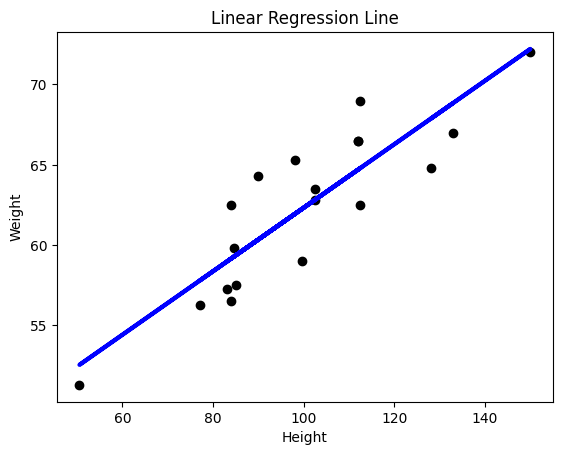

In [9]:
# plot the regression line
plt.figure(0)
plt.title('Linear Regression Line')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)